In [33]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
import time
import os
import datetime
import cv2
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from sklearn.datasets import make_circles

In [3]:
x,y = make_circles(n_samples = 1000, noise = 0.03, random_state = 42)

In [4]:
x.shape,y.shape

((1000, 2), (1000,))

<Axes: >

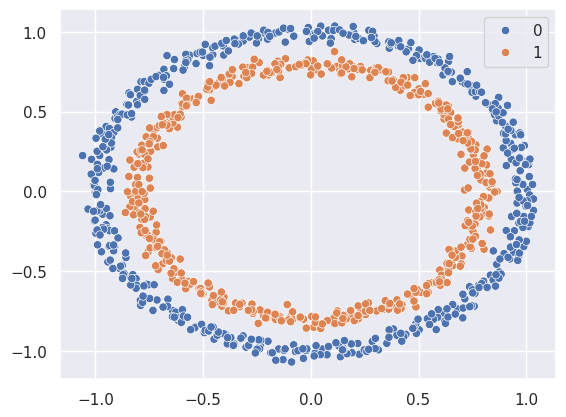

In [5]:
sns.scatterplot(x = x[:,0], y= x[:,1],hue=y)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [7]:
model=Sequential()

In [8]:
model.add(Dense(256,input_dim = 2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss ='binary_crossentropy',metrics = ['accuracy'],optimizer='Adam')

In [11]:
history = model.fit(x_train,y_train,epochs =3000,validation_split=0.2)

Streaming output truncated to the last 5000 lines.
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 502/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 503/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 504/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 505/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 506/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 507/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 508/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

<Axes: >

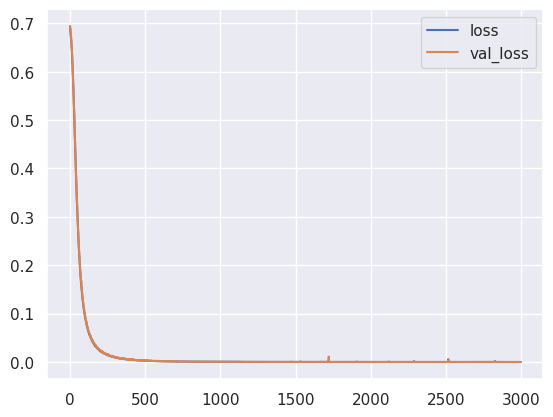

In [12]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [13]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

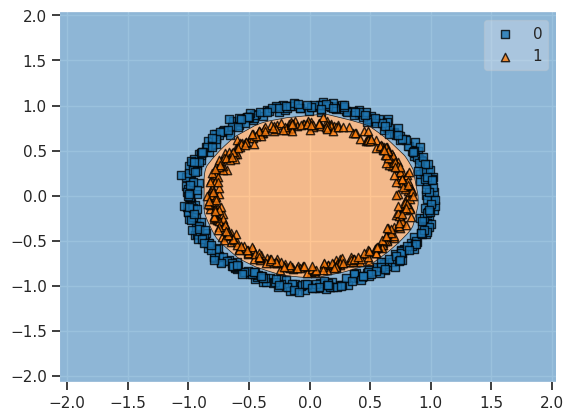

In [22]:
plot_decision_regions(x_train,y_train,clf=model)

In [30]:
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [31]:
cnf = confusion_matrix(y_test,y_pred.round())

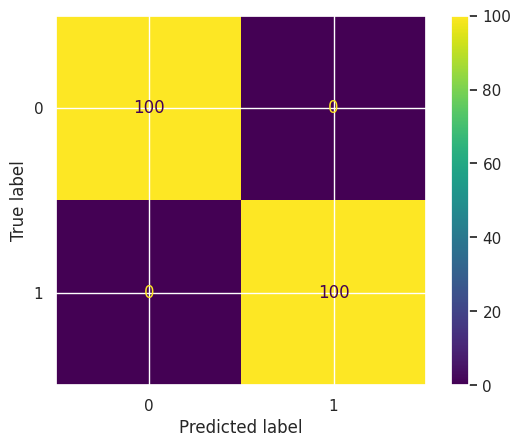

In [34]:
ConfusionMatrixDisplay(cnf).plot()

### Early Stopping

In [14]:
model1 = Sequential()

In [15]:
model1.add(Dense(256,input_dim = 2,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

In [16]:
model1.compile(loss ='binary_crossentropy',metrics = ['accuracy'],optimizer='Adam')

In [25]:
callback = EarlyStopping(monitor = 'val_loss',min_delta = 0.0001,
                         patience = 20,mode ='auto',
                         restore_best_weights = False,verbose = 1,
                         baseline = None)

In [26]:
history1 = model1.fit(x_train,y_train,epochs =3000,validation_split=0.2,callbacks = callback)

Epoch 1/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 2/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 8/3000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.

<Axes: >

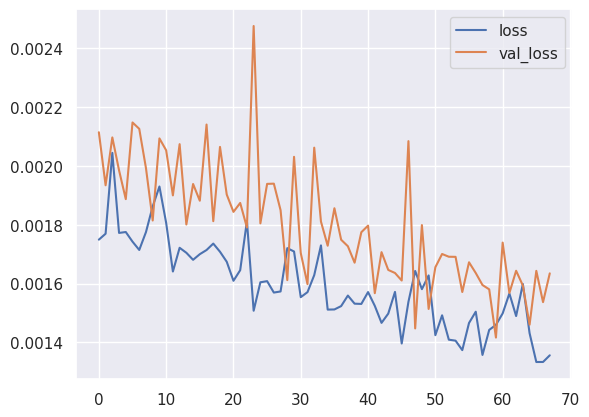

In [28]:
pd.DataFrame(history1.history)[['loss','val_loss']].plot()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

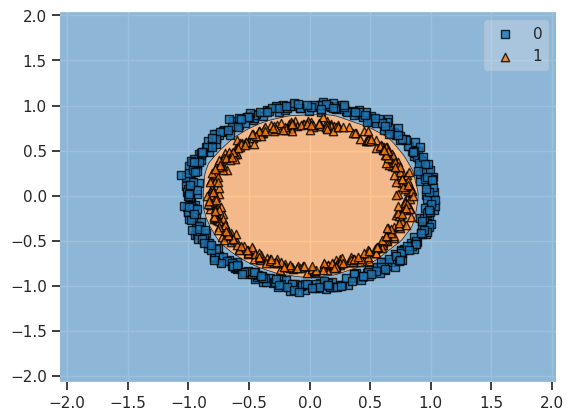

In [29]:
plot_decision_regions(x_train,y_train,clf=model1)

In [35]:
y_pred1 = model1.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [36]:
con1 = confusion_matrix(y_test,y_pred1.round())

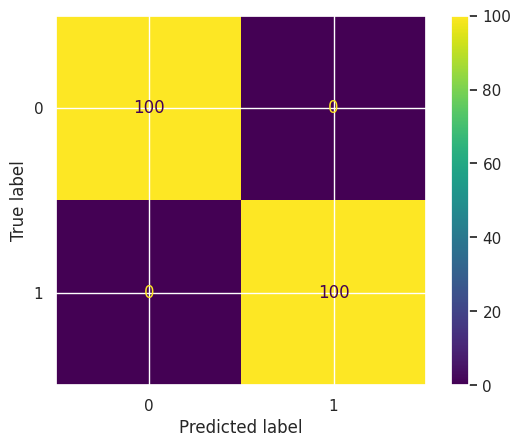

In [37]:
ConfusionMatrixDisplay(con1).plot()